In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sheet 2, Exercise 3

In [3]:
def gauss_siedel(A, b, k):
    n, m = Q.shape
    D = np.reshape([Q[i][j] if i==j else 0 for i in range(n) for j in range(n)], (n ,n))
    L = np.reshape([Q[i][j] if i>j else 0 for i in range(n) for j in range(n)], (n ,n))
    U = np.reshape([Q[i][j] if i<j else 0 for i in range(n) for j in range(n)], (n ,n))

    x = np.random.rand(n)
    for i in range(k):
        x = np.linalg.inv(D)@(b - (L + U)@x)
    return x

def poisson_mat(n, m=None):
    return 2 * np.eye(n, m) + (-1) * np.eye(n, m, k=1) + (-1) * np.eye(n, m, k=-1)

# test
for n in range(5, 20):
    Q = poisson_mat(n)
    b = np.ones(n)
    x = gauss_siedel(Q, b, k=1000)
    np.testing.assert_allclose(Q@x, b, rtol=1e-5, err_msg=f'GS failed at dim - {n}')

# Sheet 2, Exercise 5

1	44.76606865271519
2	59.35975010638131
3	22.760834328149002
4	35.62184004487854
5	15.344146462132624
6	25.450588757787248
7	11.636387156050118
8	19.801556558635184
9	9.41247817754299


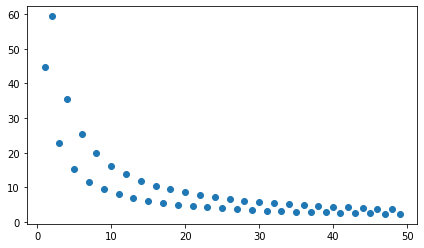

In [4]:
def neumann_polynomial_preconditioner(n, p):
    Q = poisson_mat(n)
    D = np.reshape([Q[i][j] if i==j else 0 for i in range(n) for j in range(n)], (n ,n))
    N = D-Q
    C_p = np.zeros([n, n])
    for k in range(p+1):
        C_p += np.linalg.matrix_power(N @ np.linalg.inv(D), k)
    return np.linalg.inv(D) @ C_p
    
    
n = 20
Q = poisson_mat(n)
P = np.arange(1, 50)
cond_2 = []
for p in P:
    C_p = neumann_polynomial_preconditioner(n, p)
    cond_2.append(np.linalg.cond(C_p @ Q, p=2))
    if p in np.arange(1, 10):
        print(p, cond_2[p-1], sep='\t')
    
plt.figure(figsize=[7, 4])
plt.scatter(P, cond_2)